## Trigram Language Model - Road to ChatGPT series (1)

**Status:** Public Distribution <br>

**Author:** Jaume Manero<br>
**Date created:** 2023/04/20<br>
**Last modified:** <br>
**Description:** This notebook generates a trigram language model using El Quijote <br>
**Pointers/References** <br>
www.github.com/nltk/nltk/blob/develop/nltk/lm/__init__.py  <br>
www.analyticsvidhya.com/blog/2021/07/nltk-a-beginners-hands-on-guide-to-natural-language-processing/


In [1]:
import pandas as pd
import nltk
from random import random
from nltk.util import pad_sequence
from nltk.util import bigrams
from nltk.util import ngrams
from nltk.util import everygrams
from nltk.lm.preprocessing import pad_both_ends,padded_everygram_pipeline
from nltk.lm.preprocessing import flatten
from nltk import word_tokenize, sent_tokenize 
from nltk.lm import MLE

from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt


nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/manero/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# N-grams Language Models (N-grams LM)

Nowadays, everything seems to be going neural... 

Traditionally, we can use n-grams to generate language models to predict which word comes next given a history of words. 

We'll use the `lm` module in `nltk` to get a sense of how non-neural language modelling is done.

(**Source:** The content in this notebook is largely based on [language model tutorial in NLTK documentation by Ilia Kurenkov](https://github.com/nltk/nltk/blob/develop/nltk/lm/__init__.py))

If we want to train a bigram model, we need to turn this text into bigrams. Here's what the first sentence of our text would look like if we use the `ngrams` function from NLTK for this.

In [2]:
bookname = 'elquijote'
bookname = 'Cien años de soledad'
bookname = 'shakespeare'
# opening the file in read mode
# my_file = open("./books/Cien anos de soledad - Gabriel Garcia Marquez.txt", "r", encoding="utf-8-sig")
my_file = open("./books/"+ bookname + ".txt", "r", encoding="utf-8-sig")
# reading the file
book = my_file.read()

In [3]:
# eliminar fin de frase, signos puntuacion
book = book.replace('\n', ' ')
book = book.replace("\'" ,'  ')
book = book.replace('.'  , ' ')
book = book.replace('!', ' ')
book = book.replace('?', ' ')
book = book.replace('—', ' ')

book = book.replace(':', ' ')
book = book.replace('_', ' ')
book = book.replace('¿', ' ')
book = book.replace('-', ' ')
book = book.replace(';', ' ')
book = book.replace(',', ' ')
book = book.replace('¡', ' ')

In [4]:
tokenized_book = [list(map(str.lower, word_tokenize(sent))) for sent in sent_tokenize(book)]
print('El quijote tiene', len(tokenized_book[0]), 'palabras totales')
word_count = Counter(tokenized_book[0])
print('El quijote tiene', len(word_count), 'palabras distintas')
word_count_total = sum(y for x, y in word_count.items())
print('El quijote tiene', word_count_total,'palabras totales')

El quijote tiene 937083 palabras totales
El quijote tiene 23906 palabras distintas
El quijote tiene 937083 palabras totales


In [5]:
bigrams_book = list(bigrams(tokenized_book[0]))
trigrams_book = list(ngrams(tokenized_book[0], n=3))

print(bookname, 'Tiene ', len(bigrams_book), 'bigrams')
print(bookname, 'Tiene ', len(trigrams_book), 'trigrams')
bigrams_book[0:10]

shakespeare Tiene  937082 bigrams
shakespeare Tiene  937081 trigrams


[('this', 'is'),
 ('is', 'the'),
 ('the', '100th'),
 ('100th', 'etext'),
 ('etext', 'file'),
 ('file', 'presented'),
 ('presented', 'by'),
 ('by', 'project'),
 ('project', 'gutenberg'),
 ('gutenberg', 'and')]

In [6]:
# Calculating frequencies
frequence_tri = nltk.FreqDist(trigrams_book)
frequence_bi = nltk.FreqDist(bigrams_book)
# sorting result


In [7]:
bigrams_df = pd.DataFrame (frequence_bi.items(),columns=['pairs','frequency']).sort_values(by='frequency',ascending=False)
trigrams_df = pd.DataFrame (frequence_tri.items(),columns=['tri','frequency']).sort_values(by='frequency',ascending=False)

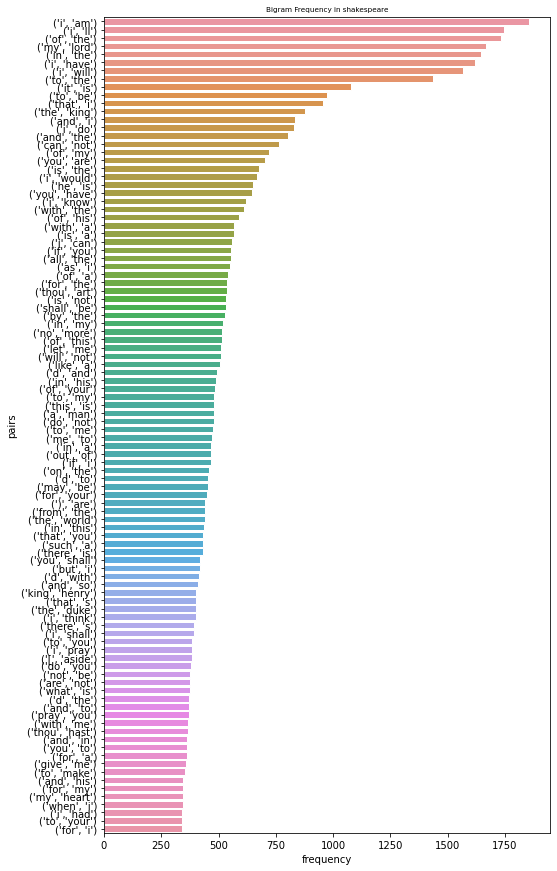

In [8]:
# create subplot of the different data frames
fig, axes = plt.subplots(1,1,figsize=(8,15))
sns.set(font_scale = 0.6)
axes.set_title('Bigram Frequency in '+bookname)
fig1 = sns.barplot(ax=axes,x='frequency',y='pairs',data=bigrams_df.head(100))
plt.show()

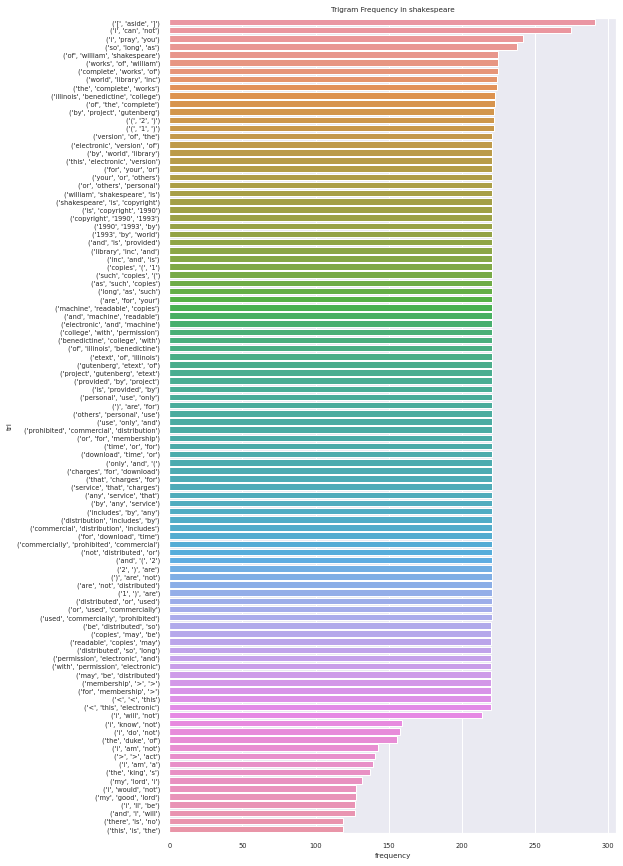

In [9]:
# create subplot trigrams
fig, axes = plt.subplots(1,1,figsize=(8,15))
sns.set(font_scale = 0.6)
axes.set_title('Trigram Frequency in '+bookname)
fig2 = sns.barplot(ax=axes,x='frequency',y='tri',data=trigrams_df.head(100))
plt.show()

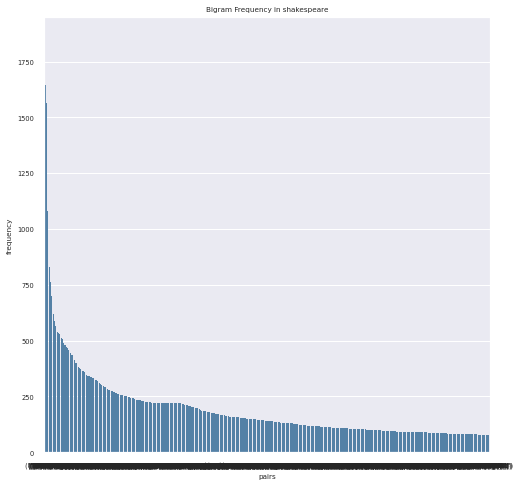

In [10]:
# See the long tail in bigram
fig, axes = plt.subplots(1,1,figsize=(8,8))
sns.set(font_scale = 0.6)
axes.set_title('Bigram Frequency in '+bookname)
sns.set_context(rc = {'patch.linewidth': 0.0})
fig1 = sns.barplot(ax=axes,x='pairs',y='frequency',data=bigrams_df.head(1000), orient='v',
                  color = 'steelblue')
plt.show()

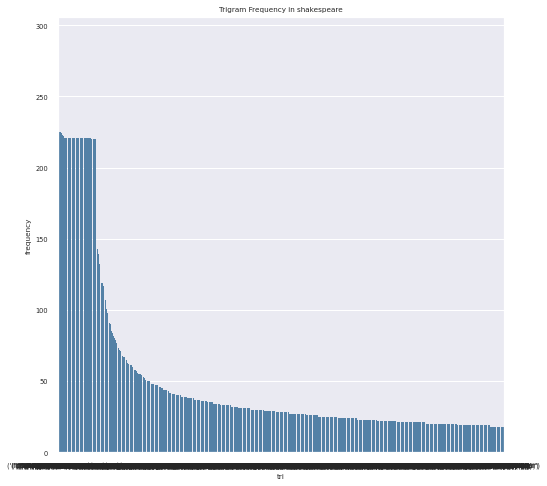

In [11]:
# See the long tail in bigram
fig, axes = plt.subplots(1,1,figsize=(8,8))
sns.set(font_scale = 0.6)
axes.set_title('Trigram Frequency in '+bookname)
sns.set_context(rc = {'patch.linewidth': 0.0})
fig1 = sns.barplot(ax=axes,x='tri',y='frequency',data=trigrams_df.head(1000), orient='v',
                  color = 'steelblue')
plt.show()

In [12]:
from nltk.tokenize.treebank import TreebankWordDetokenizer

detokenize = TreebankWordDetokenizer().detokenize

def generate_sent(model, num_words, random_seed=42):
    """
    :param model: An ngram language model from `nltk.lm.model`.
    :param num_words: Max no. of words to generate.
    :param random_seed: Seed value for random.
    """
    content = []
    for token in model.generate(num_words, random_seed=random_seed):
        if token == '<s>':
            continue
        if token == '</s>':
            break
        content.append(token)
    return detokenize(content)

In [13]:
# Let's generate some text

In [14]:
# con tri-grams
n = 3
train_data, padded_sents = padded_everygram_pipeline(3, tokenized_book)

model_3 = MLE(n)
model_3.fit(train_data, padded_sents)
print(model_3.vocab)
print("---- model ", n)
print(generate_sent(model_3, 18, random_seed=int(random()*100)))
print(generate_sent(model_3, 18, random_seed=int(random()*100)))
print(generate_sent(model_3, 18, random_seed=int(random()*100)))
print(generate_sent(model_3, 18, random_seed=int(random()*100)))

<Vocabulary with cutoff=1 unk_label='<UNK>' and 23909 items>
---- model  3
not in pleasure but in thee sebastian what if i depart that as a sullen ground my brother
be secret false what need one lear o how the ladies tattle what they will fetch my sister
almost sick for me sir thomas lovell many good morrows to your lordship thinks not him thy honour
now entertain conjecture of a king do thou thy wrongs the title thou disdain st in all petruchio


In [15]:
generate_sent(model_3, 100, random_seed=int(random()*100))

'true in me to excuse that thou wilt and if mine then yours and yours he should the bearers take up boy open t so our decrees dead to sing and dance and at my shame and courtesy my honour d friends i pray you avoid come coriolanus follow your sister is or else present death and twenty knights balk d in hell howling attends it how can this be borne as if he dote on yet they do owe their estates that never begg d your grace here my lord were he as good as himself he is too'

In [16]:
# con 4-grams
from random import random
train_data, padded_sents = padded_everygram_pipeline(n, tokenized_book)
n = 4
model_4 = MLE(n)
model_4.fit(train_data, padded_sents)
print(model_4.vocab)
print("---- model ", n)
print(generate_sent(model_4, 18, random_seed=int(random()*100)))
print(generate_sent(model_4, 18, random_seed=int(random()*100)))
print(generate_sent(model_4, 18, random_seed=int(random()*100)))
print(generate_sent(model_4, 18, random_seed=int(random()*100)))

<Vocabulary with cutoff=1 unk_label='<UNK>' and 23909 items>
---- model  4
lady the brach may stand till caesar pass along exeunt act v scene i rome a tribute not
the bastard s braves and charles the great st of day to be that princely novice was struck
a commission from which awak d besides i ha t save your life err d then an ample
not rascal like to mine own turn d that passing fair what doth he wish d king henry


In [17]:
generate_sent(model_4, 100, random_seed=int(random()*100))

'join d with looking on the birth of cain the first proportion and what to kiss for kiss thy neaf what we chang d how much methinks ham o all the haste thou canst not then our weapons alonso lead away exeunt all but york york twas my duty cannot speak of that wide gap of breath exeunt scene ii a street enter salerio and solanio lorenzo my clerk hath some hope to live chastely therefore go back one foot if salisbury be lost yet it will i keep but three glasses since we have beat us for your'

In [18]:
# con bigrams

n = 2
train_data, padded_sents = padded_everygram_pipeline(n, tokenized_book)
model_2 = MLE(n)
model_2.fit(train_data, padded_sents)
print(model_2.vocab)
print("---- model ", n)
print(generate_sent(model_2, 15, random_seed=int(random()*100)))
print(generate_sent(model_2, 15, random_seed=int(random()*100)))
print(generate_sent(model_2, 15, random_seed=int(random()*100)))
print(generate_sent(model_2, 15, random_seed=int(random()*100)))

<Vocabulary with cutoff=1 unk_label='<UNK>' and 23909 items>
---- model  2
thou shalt hear i ll have stood engag d of wealth macduff how sharp reasons
his king hereafter it is provided by that alexander is here brake through lovers they
stand where th untun d of margaret for us for your hand murder some slender
king manchus of modesty leon no foot my maid that charges for blunting us she


In [19]:
generate_sent(model_2, 100, random_seed=int(random()*100))

'hawk or whether yond same very a pied april s hose my lord my sister you have taken well he cried he so looks be seen him to convey me i would changes when in loathsome beggar nay warwick your warrior in growth of such an you are for god damn d faithfully gratiano where mine leontes i come of the capitol menenius ever scar d brother brutus the matter between you for his absolute for pity too good margaret and smilest upon my god save yourself are most constantly ham what convenience this forgiveness prospero mark for that i'

In [20]:
# con unigrams
n=1
train_data, padded_sents = padded_everygram_pipeline(n, tokenized_book)

model_1 = MLE(n)
model_1.fit(train_data, padded_sents)
print(model_1.vocab)
print("---- model ", n)
print(generate_sent(model_1, 15, random_seed=int(random()*100)))
print(generate_sent(model_1, 15, random_seed=int(random()*100)))
print(generate_sent(model_1, 15, random_seed=int(random()*100)))
print(generate_sent(model_1, 15, random_seed=int(random()*100)))

<Vocabulary with cutoff=1 unk_label='<UNK>' and 23907 items>
---- model  1
s the messala me i your fury by fiend fetches have follows be have guess
might the with gainst than shall rascal be acknowledge i strange faith marcius hard thoughts
s at cog of have way the to in thing not thinks hath my it
have call princess and musicians his and may all is and as is they bitten


In [21]:
generate_sent(model_2, 100, random_seed=int(random()*100))

'him this hand and machine readable copies (2) and yet shall go to the aim d hath abundance of time or to my kinsman s suit he lose but now she is as we shall slay in yourself mirth broke his body that would unclog my lord how now a broken meats a worthy prince and porridge after you seek this happy and sweet portia i did they entered proofread edited copyright 1990 1993 by us scornfully at anything that comes to do not distributed so or for my lord of wasps that answer what says he s'

In [22]:
import session_info
session_info.show(html=False)

-----
matplotlib          3.5.0
nltk                3.8.1
pandas              1.5.3
seaborn             0.11.2
session_info        1.0.0
-----
IPython             7.29.0
jupyter_client      8.2.0
jupyter_core        5.3.0
notebook            6.5.4
-----
Python 3.8.12 (default, Oct 12 2021, 13:49:34) [GCC 7.5.0]
Linux-5.19.0-40-generic-x86_64-with-glibc2.17
-----
Session information updated at 2023-04-26 18:08


In [23]:
#EOF